# Problem Set 3

In [182]:
import numpy as np
from scipy import linalg as la


## QR Decomposition 1

In [129]:
def modGSQR(A):
    """
    QR decomposition via modified Gram-Schmidt procedure
    -------------------
    A: a m x n matrix
        rank n 
    -------------------
    returns:
        Q, R
    """
    m, n = np.shape(A)
    Q = np.copy(A)
    R = np.zeros((n, n))
    for i in range(n):
        R[i][i] = la.norm(Q[:,i])
        Q[:,i] = Q[:,i]/R[i][i]
        for j in range(i + 1, n):
            R[i][j] = np.dot(Q[:,j].T, Q[:,i])
            Q[:,j] = Q[:,j]-R[i][j]*Q[:,i]
    return Q, R

In [130]:
A = np.random.random((6,4))
print(A)


[[ 0.41917047  0.50765726  0.63288333  0.47453417]
 [ 0.37232781  0.31549966  0.01435574  0.31309193]
 [ 0.23920935  0.05117066  0.06335192  0.13769872]
 [ 0.0751713   0.1298371   0.28915918  0.3789476 ]
 [ 0.34388762  0.1333794   0.39042999  0.0146978 ]
 [ 0.9195765   0.65793577  0.9549533   0.68803081]]


In [147]:
Q, R = modGSQR(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[ 0.19697726  0.20102274  0.61054151 -0.46964869]
 [ 0.31158196  0.03124915 -0.17874136 -0.25829445]
 [ 0.20654125  0.7135374   0.28868853  0.04805048]
 [ 0.52704384  0.18156348 -0.62948505 -0.33961079]
 [ 0.55066157  0.04246167  0.08326554  0.75632883]
 [ 0.49036107 -0.64397937  0.32979531 -0.15177763]]
[[ 1.26437889  1.28339594  1.17982435  0.39538573]
 [ 0.          0.92384627 -0.02945439  0.17021669]
 [ 0.          0.          0.87548165  0.08151265]
 [ 0.          0.          0.          0.27475995]]
True
True
True


In [132]:
Q,R = la.qr(A, mode="economic")
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[-0.36196185  0.69941613 -0.15375047  0.2764617 ]
 [-0.3215123   0.13328831  0.8359573  -0.06080965]
 [-0.20656192 -0.46035185  0.16063493 -0.4006723 ]
 [-0.06491187  0.26522233 -0.34729971 -0.7779924 ]
 [-0.29695364 -0.44627234 -0.32464529  0.38478459]
 [-0.79407218 -0.10782207 -0.16037753 -0.0774692 ]]
[[-1.15805153 -0.86624345 -1.13979257 -0.87617837]
 [ 0.          0.27753175  0.21488641  0.32999972]
 [ 0.          0.         -0.455458   -0.03583378]
 [ 0.          0.          0.         -0.28548461]]
True
True
True


As seen above, the functions runs as desired.

In [133]:
def det(A):
    return abs(modGSQR(A)[1].diagonal().prod())

In [134]:
A = np.random.random((5,5))
print(A)

[[ 0.03378353  0.68632227  0.11433298  0.09934312  0.34630835]
 [ 0.58045828  0.44477912  0.60587848  0.65990974  0.31362938]
 [ 0.69322938  0.3235393   0.77679819  0.60498136  0.60719123]
 [ 0.81901114  0.99148977  0.87205255  0.71724131  0.07546142]
 [ 0.89493538  0.92028849  0.56740093  0.62476632  0.11799297]]


In [135]:
det(A)

0.027186788110277599

In [136]:
la.det(modGSQR(A)[1])

0.027186788110277603

Problem 3:

In [137]:
def solveEqviaQR(A, b):
    """
    Solve for x in Ax = b via QR-decomposition
    -------------------
    A: a n x n matrix
        rank n 
    b: a vector of length n
    -------------------
    returns:
        x
    """
    Q, R = modGSQR(A)
    y = np.dot(Q.T, b)
    
    n = np.size(y)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(R[i, i+1:] * x[i+1:]))/R[i,i]
    return x.T


In [138]:
A = np.random.random((4,4))
b = np.random.random((4,1))
solveEqviaQR(A, b)

array([-0.95200875, -0.45691736, -0.3334709 ,  1.98773153])

In [139]:
la.solve(A,b).T

array([[-0.95200875, -0.45691736, -0.3334709 ,  1.98773153]])

The results are as desired.

Problem 4

In [150]:
def householder(A):
    sign = lambda x: 1 if x>=0 else -1
    m, n = np.shape(A)
    R = np.copy(A)
    Q = np.eye(m)
    for k in range(n):
        u = np.copy(R[k:,k])
        u[0] = u[0]+sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        R[k:,k:] += -2*np.outer(u, np.dot(u.T, R[k:,k:]))
        Q[k:,:] += -2*np.outer(u, np.dot(u.T, Q[k:,:]))
    return Q.T, R

In [151]:
A = np.random.random((5, 3))
Q,R = la.qr(A)
print(A.shape, Q.shape, R.shape)
np.allclose(Q.dot(R), A)


(5, 3) (5, 5) (5, 3)


True

In [156]:
A = np.random.random((4,4))
print(A)

[[ 0.92745685  0.59595948  0.66840013  0.0889113 ]
 [ 0.05632404  0.45394804  0.61642709  0.54086517]
 [ 0.1165015   0.26463787  0.18629344  0.84301667]
 [ 0.833991    0.16694011  0.68413375  0.5987934 ]]


In [157]:
Q, R = modGSQR(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[ 0.73961142  0.28081374 -0.52266531 -0.31770989]
 [ 0.04491627  0.77599548  0.59845414 -0.19407781]
 [ 0.0929055   0.38004438 -0.20912228  0.89621577]
 [ 0.66507597 -0.41778097  0.5700364   0.24122919]]
[[ 1.25397855  0.59678225  0.99435257  0.56661745]
 [ 0.          0.55044497  0.45102228  0.5148957 ]
 [ 0.          0.          0.37057681  0.44225261]
 [ 0.          0.          0.          0.76675336]]
True
True
True


In [159]:
Q, R = householder(A)
print(Q)
print(R)
print(np.allclose(np.triu(R), R))
print(np.allclose(np.dot(Q.T, Q), np.identity(4)))
print(np.allclose(np.dot(Q, R), A))

[[-0.73961142 -0.28081374 -0.52266531  0.31770989]
 [-0.04491627 -0.77599548  0.59845414  0.19407781]
 [-0.0929055  -0.38004438 -0.20912228 -0.89621577]
 [-0.66507597  0.41778097  0.5700364  -0.24122919]]
[[-1.25397855 -0.59678225 -0.99435257 -0.56661745]
 [ 0.         -0.55044497 -0.45102228 -0.5148957 ]
 [ 0.          0.          0.37057681  0.44225261]
 [ 0.          0.          0.         -0.76675336]]
True
True
True


Despite the occasional difference in sign, (which is acceptable since QR need not be unique), the Householder algorithm works well.

Problem 5

In [176]:
def hessenberg(A):
    sign = lambda x: 1 if x>=0 else -1
    m, n = np.shape(A)
    H = np.copy(A)
    Q = np.eye(m)
    for k in range(n - 2):
        u = np.copy(H[k + 1:,k])
        u[0] = u[0]+sign(u[0])*la.norm(u)
        u = u/la.norm(u)
        H[k+1:,k:] += -2*np.outer(u, np.dot(u.T, H[k+1:,k:]))
        H[:,k+1:] += -2*np.outer(np.dot(H[:,k+1:], u), u.T)
        Q[k+1:,:] += -2*np.outer(u, np.dot(u.T, Q[k+1:,:]))
    return H, Q.T

In [174]:
# Generate a random matrix and get its upper Hessenberg form via SciPy.
A = np.random.random((4,4))
H, Q = la.hessenberg(A, calc_q=True)
print(H)
print(Q)
# Verify that H has all zeros below the first subdiagonal and QHQ^T = A.
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(np.dot(np.dot(Q, H), Q.T), A))


[[ 0.94171631 -1.05660234  0.06858157  0.07559878]
 [-0.89758448  1.24665458 -0.61080453  0.12201121]
 [ 0.         -0.65897675  0.10501477  0.32528192]
 [ 0.          0.         -0.77413151 -0.52006329]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.06475075  0.99579015 -0.0648793 ]
 [ 0.         -0.65114737 -0.09142882 -0.7534241 ]
 [ 0.         -0.75618413 -0.00653879  0.65432622]]
True
True


In [181]:
H, Q = hessenberg(A)
print(H)
print(Q)
# Verify that H has all zeros below the first subdiagonal and QHQ^T = A.
print(np.allclose(np.triu(H, -1), H))
print(np.allclose(np.dot(np.dot(Q, H), Q.T), A))

[[  9.41716309e-01  -1.05660234e+00   6.85815699e-02   7.55987812e-02]
 [ -8.97584483e-01   1.24665458e+00  -6.10804529e-01   1.22011205e-01]
 [  0.00000000e+00  -6.58976749e-01   1.05014766e-01   3.25281915e-01]
 [  1.11022302e-16   0.00000000e+00  -7.74131505e-01  -5.20063285e-01]]
[[ 1.          0.          0.          0.        ]
 [ 0.         -0.06475075  0.99579015 -0.0648793 ]
 [ 0.         -0.65114737 -0.09142882 -0.7534241 ]
 [ 0.         -0.75618413 -0.00653879  0.65432622]]
True
True


The matrices are the same.

## QR Decomposition 2

Problem 1

In [186]:
def LSviaQR(A, b):
    """
    Least Squares solution via QR decomposition
    -------------------
    A: a m x n matrix
        rank n 
    b: a vector of length n
    -------------------
    returns:
        x
    """
    Q, R = modGSQR(A) 
    y = np.dot(Q.T, b)
    x = la.solve_triangular(R, y)
    return x

In [ ]:

A = np.random.random((4,4))
b = np.random.random((4,1))

Problem 2

[[   0.      0.5     1.      1.5     2.      2.5     3.      3.5     4.
     4.5     5.      5.5     6.      6.5     7.      7.5     8.      8.5
     9.      9.5    10.     10.5    11.     11.5    12.     12.5    13.
    13.5    14.     14.5    15.     15.5    16.  ]
 [ 136.86  142.7   146.53  152.65  156.08  163.71  168.12  176.16  182.12
   193.75  201.04  214.33  219.4   224.39  223.85  223.79  211.57  203.97
   193.75  193.51  187.84  187.59  177.82  181.29  178.66  188.22  190.87
   203.11  203.56  212.7   214.26  224.9   226.51]]


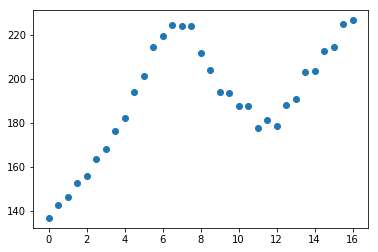

In [193]:
from matplotlib import pyplot as plt
housing = np.load("housing.npy")
print(housing.T)
plt.scatter(housing.T[0], housing.T[1])
plt.show()

In [199]:
# Construct A

years = housing.T[0]
A = np.vstack([years, np.ones(len(years))]).T


print(A)

[[  0.    1. ]
 [  0.5   1. ]
 [  1.    1. ]
 [  1.5   1. ]
 [  2.    1. ]
 [  2.5   1. ]
 [  3.    1. ]
 [  3.5   1. ]
 [  4.    1. ]
 [  4.5   1. ]
 [  5.    1. ]
 [  5.5   1. ]
 [  6.    1. ]
 [  6.5   1. ]
 [  7.    1. ]
 [  7.5   1. ]
 [  8.    1. ]
 [  8.5   1. ]
 [  9.    1. ]
 [  9.5   1. ]
 [ 10.    1. ]
 [ 10.5   1. ]
 [ 11.    1. ]
 [ 11.5   1. ]
 [ 12.    1. ]
 [ 12.5   1. ]
 [ 13.    1. ]
 [ 13.5   1. ]
 [ 14.    1. ]
 [ 14.5   1. ]
 [ 15.    1. ]
 [ 15.5   1. ]
 [ 16.    1. ]]


In [202]:
prices = housing.T[1]
b = prices.T
print(b)

[ 136.86  142.7   146.53  152.65  156.08  163.71  168.12  176.16  182.12
  193.75  201.04  214.33  219.4   224.39  223.85  223.79  211.57  203.97
  193.75  193.51  187.84  187.59  177.82  181.29  178.66  188.22  190.87
  203.11  203.56  212.7   214.26  224.9   226.51]


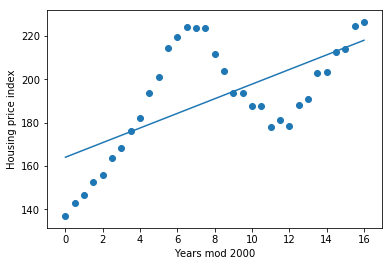

In [205]:
x = LSviaQR(A, b)
m, n = x
plt.plot(years, m*years + n )
plt.scatter(years, prices)
plt.xlabel("Years mod 2000")
plt.ylabel("Housing price index")

plt.show()

Problem 3

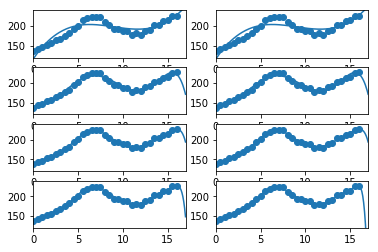

In [257]:

degrees = [3,6,9, 12]
for j in range(len(degrees)):
    plt.subplot(len(degrees),2,2*j + 1)
    i = degrees[j]
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T
    #y.describe()
    #p = lambda x: np.dot(np.vander(x, i + 1)[0], coeffs)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    coeffspoly = np.polyfit(years, prices, i)
    y = np.dot(np.vander(x, i + 1), coeffspoly).T
    plt.subplot(len(degrees),2,2*j + 2)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    
    #print(coeffs)
    #print(np.vander( [0.8], i + 1)[0])
    #print(np.dot(np.vander([0.8], i + 1)[0], coeffs))
plt.show()

# which is barely distinguishable

Nicer comparison frame:

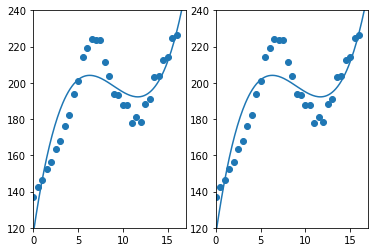

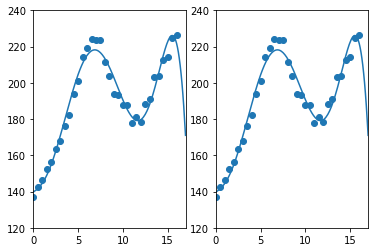

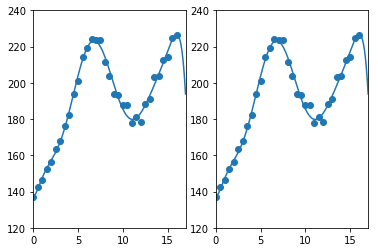

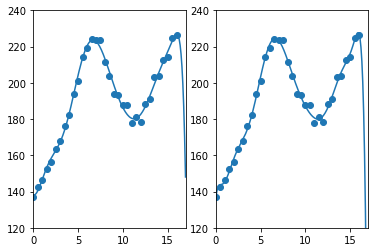

In [260]:
degrees = [3,6,9, 12]
for j in range(len(degrees)):
    i = degrees[j]
    plt.title('Polynomial fit comparison, n = ' + str(i))
    plt.subplot(1,2, 1)
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T
    #y.describe()
    #p = lambda x: np.dot(np.vander(x, i + 1)[0], coeffs)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    coeffspoly = np.polyfit(years, prices, i)
    y = np.dot(np.vander(x, i + 1), coeffspoly).T
    plt.subplot(1,2,2)
    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    
    plt.show()
    
    #print(coeffs)
    #print(np.vander( [0.8], i + 1)[0])
    #print(np.dot(np.vander([0.8], i + 1)[0], coeffs))


Bigger graphs

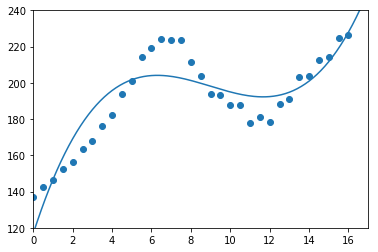

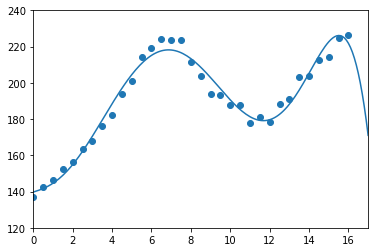

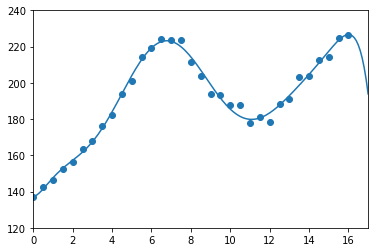

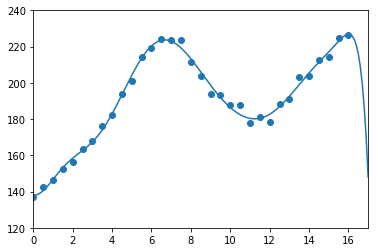

In [250]:
degrees = [3,6,9, 12]
for j in range(len(degrees)):
    i = degrees[j]
    A = np.vander(years, i + 1)
    coeffs = la.lstsq(A, b)[0]
    x = np.linspace(0,17,171)
    A = np.vander( x , i + 1)
    y = np.dot(np.vander(x, i + 1), coeffs).T

    plt.plot(x, y)
    plt.scatter(years, prices)
    plt.xlim(0, 17)
    plt.ylim(120, 240)
    plt.show()


Problem 4

In [261]:
def plot_ellipse(a, b, c, d, e):
    """Plot an ellipse of the form ax^2 + bx + cxy + dy + ey^2 = 1."""
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4*A))/(2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2)
    plt.gca().set_aspect("equal", "datalim")

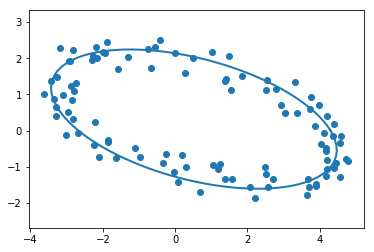

'print(np.random.random((1, len(x))))\nxt = x.T + 30*(np.random.random((1, len(x)))[0]-0.5)\nx = xt.T\nA = np.column_stack((x**2, x, x*y, y, y**2))\nprint(A.shape)\nb = np.ones(len(x))\na, b, c, d, e = la.lstsq(A, b)[0]\n\n\nplt.scatter(x,y)\nplot_ellipse(a, b, c, d, e)\nplt.show()\n'

In [303]:
ellipsedata = np.load("ellipse.npy")
x, y = ellipsedata.T
A = np.column_stack((x**2, x, x*y, y, y**2))
#print(A.shape)
b = np.ones(len(x))
#print(la.lstsq(A, b)[0])
a, b, c, d, e = la.lstsq(A, b)[0]


plt.scatter(x,y)
plot_ellipse(a, b, c, d, e)
plt.show()

"""print(np.random.random((1, len(x))))
xt = x.T + 30*(np.random.random((1, len(x)))[0]-0.5)
x = xt.T
A = np.column_stack((x**2, x, x*y, y, y**2))
print(A.shape)
b = np.ones(len(x))
a, b, c, d, e = la.lstsq(A, b)[0]


plt.scatter(x,y)
plot_ellipse(a, b, c, d, e)
plt.show()
"""


Problem 5

In [328]:
def power(A, N, tol):
    """
    power method to find dominant eigenvalue 
    and corresponding eigenvector
    -------------------
    A:
        a n x n matrix, full rank
    N: 
        maximum number of iterations
    tol: 
        tolerance for convergence
    -------------------
    returns:
        eigenvalue, eigenvector
    """
    m, n = np.shape(A)
    v = np.random.rand(n)
    xm1 = v/la.norm(v)
    k = 1
    dist = tol + 1
    while (k<=N and dist > tol):
        x = np.dot(A,xm1)
        x = x/la.norm(x)
        dist = np.linalg.norm(x-xm1)
        xm1 = x
        k+=1
    return np.dot(x.T, np.dot(A,x)), x

In [329]:
A = np.array([[1, 0,0],[0,3,0],[0,0,-1]])
#np.random.random((3, 3))
power(A, 100000 , 1e-12)

(3.0, array([  4.39084417e-15,   1.00000000e+00,   8.74855430e-14]))

In [331]:
A = np.random.random((10,10))
# Compute the eigenvalues and eigenvectors of A via SciPy.
eigs, vecs = la.eig(A)
# Get the dominant eigenvalue and eigenvector of A.
# The eigenvector of the kth eigenvalue is the kth column of 'vecs'.
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]
# Verify that Ax = lambda x.
print(np.allclose(A.dot(x), lamb*x))


# My code
lamb, x = power(A, 100000 , 1e-12)
# Verify that Ax = lambda x.
np.allclose(A.dot(x), lamb*x)

True


True

Problem 6

In [358]:
from cmath import sqrt

def evalsviaQR(A, N, tol):
    """
    function to find eigenvalues of A
    via QR decomposition with Hessenberg pre-conditioning
    -------------------
    A:
        a n x n matrix, full rank
    N: 
        maximum number of iterations
    tol: 
        tolerance for convergence
    -------------------
    returns:
        eigenvalues of A
    """
    m, n = np.shape(A)
    S = la.hessenberg(A)
    k = 0
    for i in  range(N):
        Q, R = la.qr(S)
        S = np.dot(R,Q)
    eigs = []
    i = 0
    while i < n-1:
        if abs(S[i+1,i]) < tol:
            eigs.append(S[i][i])
        else:
            eigp = 0.5*(a+d + sqrt((a+d)**2+4*b*c))
            eigs.append(eigp)
            eigm = 0.5*(a+d - sqrt((a+d)**2+4*b*c))
            eigs.append(eigm)
            i += 1
        i += 1
    eigs.append(S[n-1][n-1])
    return eigs

In [419]:
A = np.random.random((4, 4))
A = (A + A.T)/2
A = [[1,0,0],[0,2,2],[0,2,-2]]
print(np.dot(A, [3, 1, 2]))
#print(evalsviaQR(A, 10000, 1e-8))
print(la.eig(A))
print(la.eig(A)[1])
print(la.eig(A)[1].T[:2])

[ 3  6 -2]
(array([-2.82842712+0.j,  2.82842712+0.j,  1.00000000+0.j]), array([[ 0.        ,  0.        ,  1.        ],
       [ 0.38268343, -0.92387953,  0.        ],
       [-0.92387953, -0.38268343,  0.        ]]))
[[ 0.          0.          1.        ]
 [ 0.38268343 -0.92387953  0.        ]
 [-0.92387953 -0.38268343  0.        ]]
[[ 0.          0.38268343 -0.92387953]
 [ 0.         -0.92387953 -0.38268343]]


The calculated eigenvalues are the same in both methods.

# The SVD and Image Compression

Problem 1

In [437]:
from math import sqrt
import numpy as np



def truncated_svd(A, k = None):
    m,n = np.shape(A)
    evals, evecs = la.eig(np.dot(np.conjugate(A).T, A))
    ind = evals.argsort()[::-1]
    evals = evals[ind]
    evecs = evecs[ind]
    
    for i in range(len(evals) -1, -1, -1):
        if evals[i] == 0:
            evals = np.delete(evals, i)
            evecs = np.delete(evecs, i)
        else:
            break
                  
    r = len(evals)
    
    if k == None:
        k = r
        
    evals = evals[:k]
    evecs = evecs.T[:k]

    svals = np.ones(k)
    for i in range(k):
        svals[i] = sqrt(evals[i]) 
              
    
    U = np.zeros((m,r))   
    Sigma = np.zeros((r, r))
    V = np.zeros((n,r))

    for i in range (0, r):
        V[:,i] = evecs[i]
        Sigma[i,i] = svals[i]
        U[:,i] = (1 / svals[i]) * np.dot(A, evecs[i]) 
    return U, Sigma, V 

A = np.random.random((10,8))

U, Sigma, V = truncated_svd(A)

np.allclose(np.dot(np.dot(U , Sigma ), V.T), A)

/Users/Jan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


True

[4 3 3 2 1 0 0 0 0]
[4 3 3 2 1 0 0 0 0]
[4 3 3 2 1 7 7 7 7]
0
dsdf
0
dsdf
0
dsdf
0
dsdf
1
[4 3 3 2 1]
[4 3 3 2 1]


In [393]:
a = np.array([1,3,4,0,3,0,2,0,0])
a[::-1]

array([0, 0, 2, 0, 3, 0, 4, 3, 1])

Problem 2

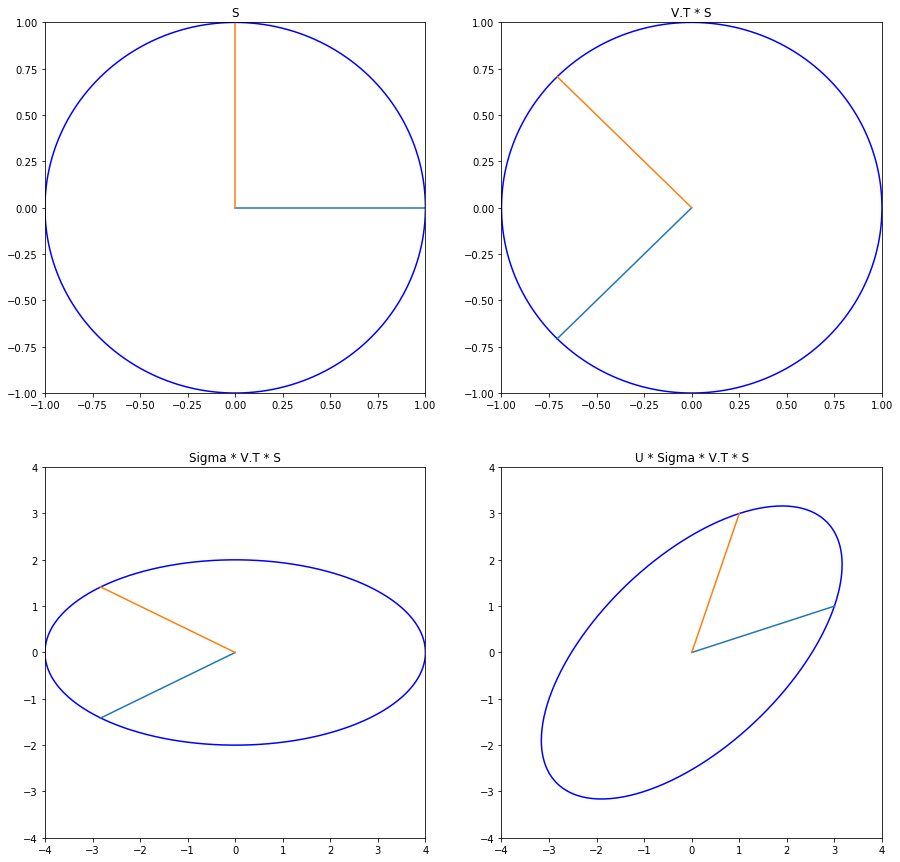

In [463]:
from matplotlib import pyplot as plt
import pylab

A = np.array([[3,1],[1,3]])
U, Sigma, V = la.svd(A)
Sigma = np.diag(Sigma)

theta = np.linspace(0, 2*np.pi, 400)
x = np.cos(theta)
y = np.sin(theta)
S = np.vstack([x,y])



t = np.linspace(0, 1, 100)
exx = t
exy = 0*t
ex = np.vstack([exx, exy])

eyx = 0*t
eyy = t
ey = np.vstack([eyx, eyy])


xplot = np.linspace(0,1,20)
yplot = np.zeros_like(xplot)
first = np.vstack((xplot, yplot))

yplot1 = np.linspace(0,1,20)
xplot1 = np.zeros_like(yplot1)
second = np.vstack((xplot1, yplot1))
 
# S
plt.subplot(221)
plt.plot(x,y, c = "b")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.plot(exx, exy)
plt.plot(eyx, eyy)
plt.title("S")

# V^H * S
plt.subplot(222)
VTS = np.dot(V.T, S)
x = VTS[0,:]
y = VTS[1,:]
plt.plot(x,y, c = "b")
plt.xlim([-1, 1])
plt.ylim([-1, 1])
VTex = np.dot(V.T, ex)
VTey = np.dot(V.T, ey)
plt.plot(VTex[0,:],VTex[1,:])
plt.plot(VTey[0,:],VTey[1,:])
plt.title("V.T * S")

# Sigma * V^H * S
plt.subplot(223)
SigVTS = np.dot(Sigma, VTS)
x = SigVTS[0,:]
y = SigVTS[1,:]
plt.plot(x,y, c = "b")
SigVTex = np.dot(Sigma, VTex)
SigVTey = np.dot(Sigma, VTey)
plt.plot(SigVTex[0,:],SigVTex[1,:])
plt.plot(SigVTey[0,:],SigVTey[1,:])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("Sigma * V.T * S")

# U * Sigma * V^H * S
plt.subplot(224)
USigVTS = np.dot(U, SigVTS)
x = USigVTS[0,:]
y = USigVTS[1,:]
plt.plot(x,y, c = "b")
USigVTex = np.dot(U, SigVTex)
USigVTey = np.dot(U, SigVTey)
plt.plot(USigVTex[0,:],USigVTex[1,:])
plt.plot(USigVTey[0,:],USigVTey[1,:])
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("U * Sigma * V.T * S")

plt.show()

Problem 3

In [530]:
def svd_approx(A, k):
    U, Sigma, V = la.svd(A, full_matrices=False)
    for i in range(k,len(Sigma)):
        Sigma[i] = 0
    Sigma = np.diag(Sigma) 
    SigV = np.dot(Sigma, V)
    A_k = np.dot(U, SigV)    
    return A_k

A = np.diag([2,3,5,0.4, 0.04, 0.01, 0.1, 1])
svd_approx(A, 5)

array([[ 2. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  3. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  5. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ]])

Problem 4

In [531]:
def lowest_rank_approx(A, e):
    U, Sigma, V = la.svd(A, full_matrices=False)
    for i in range(len(Sigma)):
        if Sigma[i] < e:
            Sigma[i] = 0
    return np.dot(U, np.dot(np.diag(Sigma), V.T))
            

In [532]:
A = np.diag([2,3,5,0.4, 0.04, 0.01])

In [533]:
lowest_rank_approx(A, 0.02)

array([[ 2.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  3.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  5.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.4 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.04,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

Problem 5:

In [544]:
def compress_img(filename, k):
    X = plt.imread(filename).astype(float)
    
    R = X[:,:,0]/255
    G = X[:,:,1]/255
    B = X[:,:,2]/255
    
    R = svd_approx(R,k)
    G = svd_approx(G,k)
    B = svd_approx(B,k)
    
    for i in [R, G, B]:
        for val in i:
            ind1 = (val < 0)
            val[ind1] = 0
            ind2 = (val > 1)
            val[ind2] = 1
    
    plt.subplot(121)
    plt.title("Original Image")
    X = X/255
    plt.imshow(X)
    
    plt.subplot(122)
    plt.title("Rank "+ str(k) + " Approximation")
    m, n = R.shape
    print(m,n)
    approx = np.zeros((m,n,3))
    approx[:,:,0] = R
    approx[:,:,1] = G
    approx[:,:,2] = B
    
    plt.imshow(approx)
    plt.show()

1158 1041


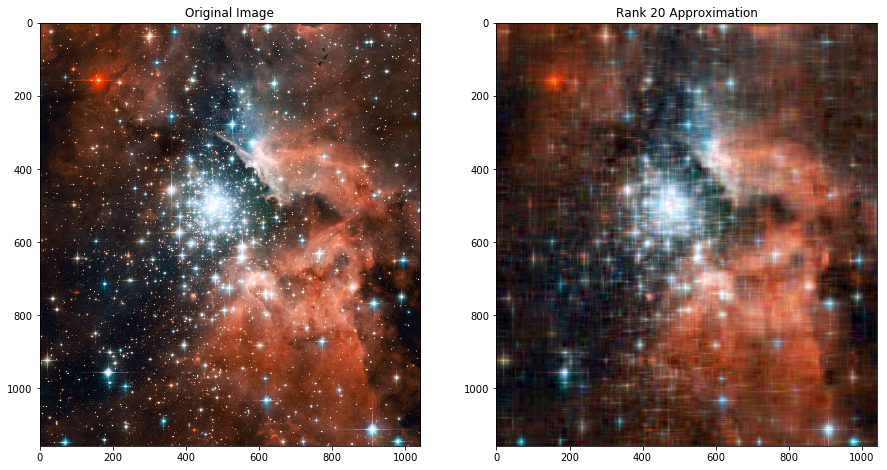

In [548]:
compress_img('hubble.jpg',20)

999 1776


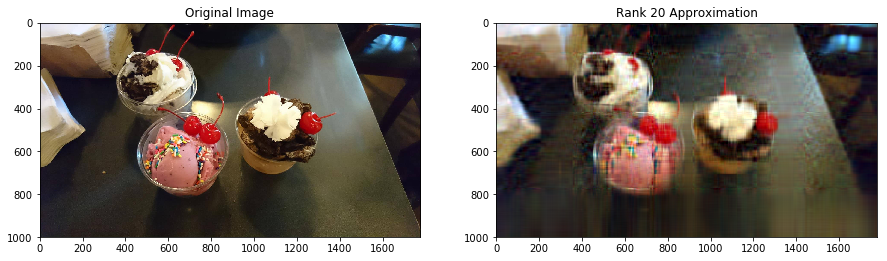

In [551]:
compress_img('icecream.jpg',20)

3366 5984


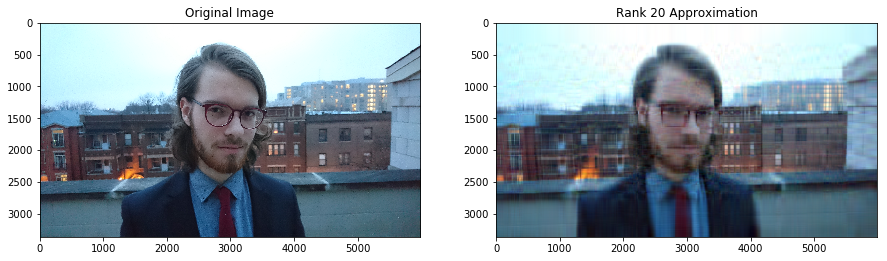

In [552]:
compress_img('Portrait.jpg',20)

The approximation makes my glasses rectangular, so it must work correctly.


# The Drazin Inverse